In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.datasets import make_circles
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
np.random.seed(25)
X, y = make_circles(n_samples = 1000, factor=0.1, noise=0.4, random_state=25)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)



In [6]:
X.shape

(1000, 2)

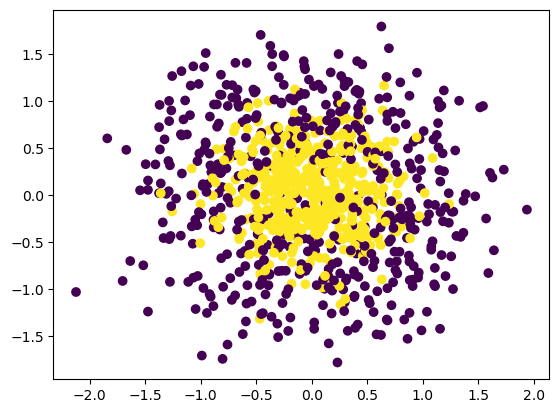

In [7]:
plt.scatter(X[:,0], X[:, 1], c=y)

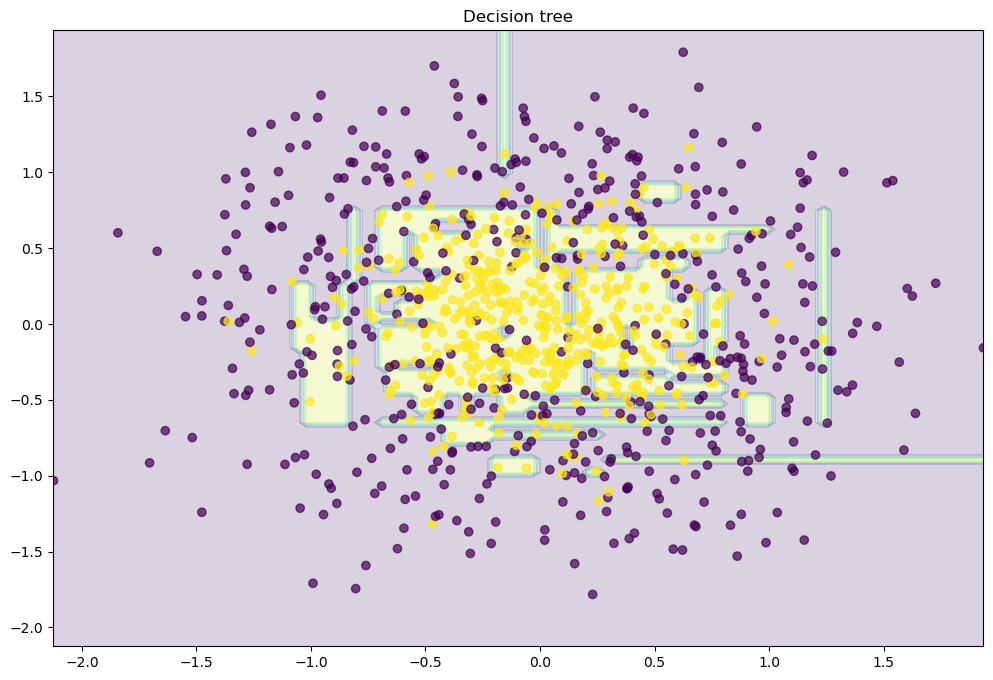

In [9]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=25)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()


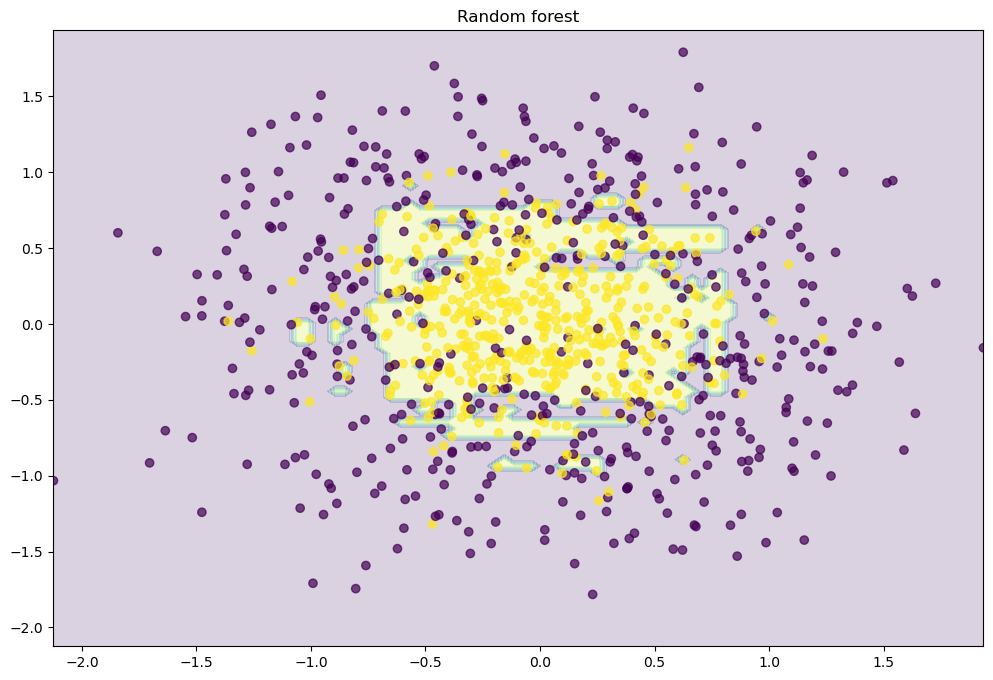

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=25)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()

In [11]:
n_train = 150        
n_test = 1000       
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

(-5.0, 5.0)

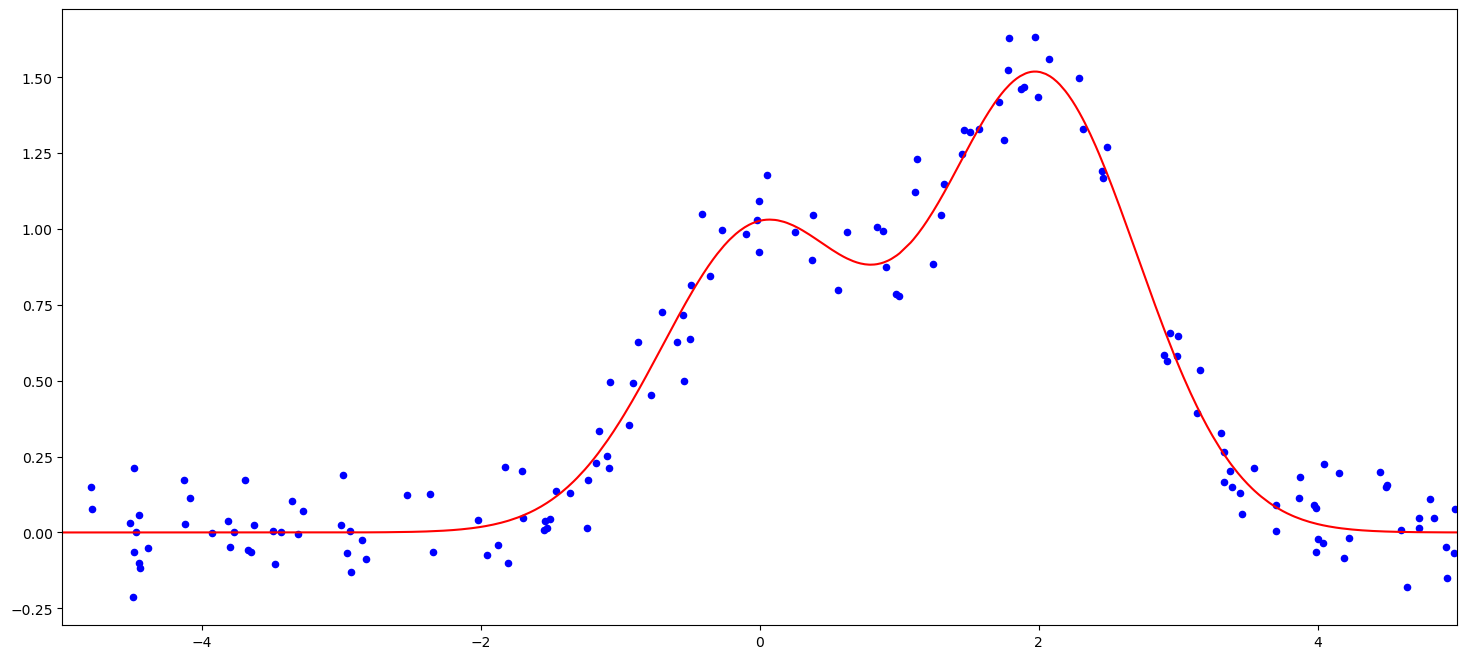

In [12]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.xlim([-5, 5])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.408e+00, tolerance: 3.917e-03
  model = cd_fast.enet_coordinate_descent(


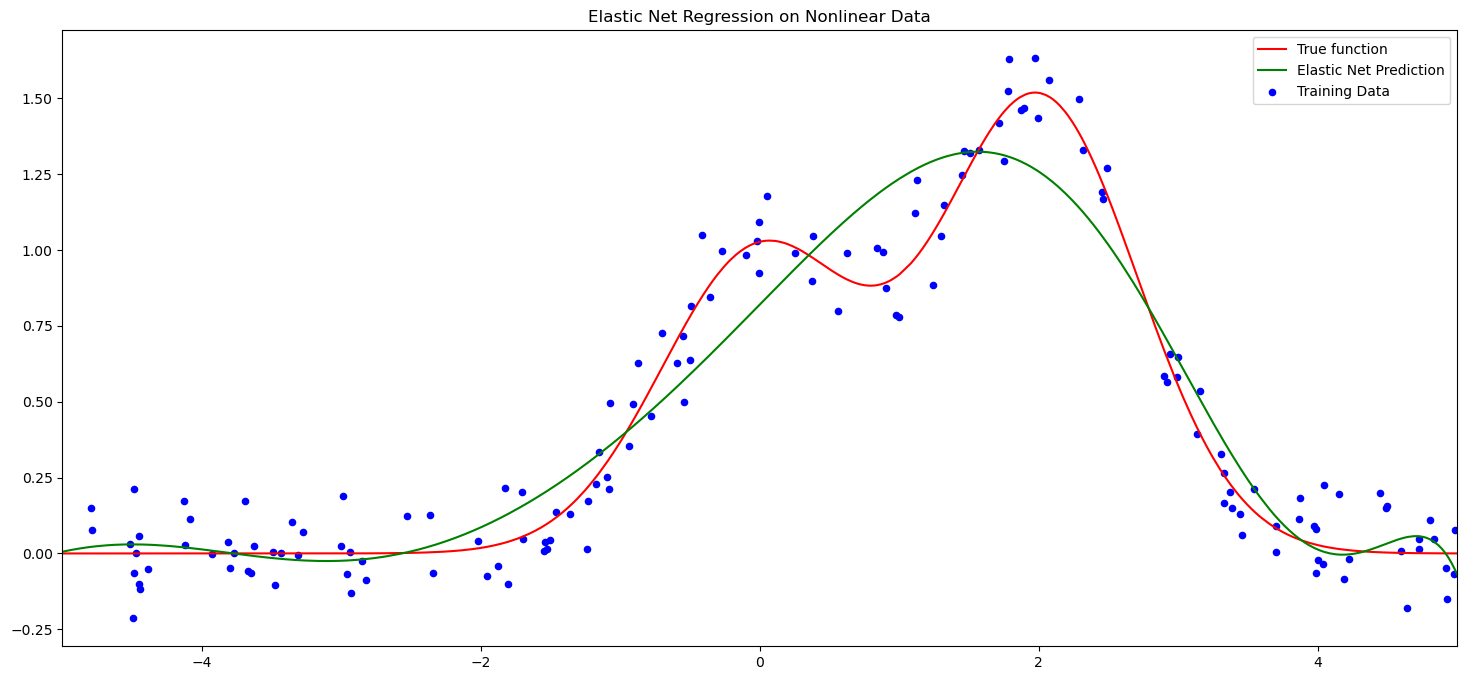

Elastic Net, MSE = 26.20


In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a polynomial Elastic Net model (since the true function is nonlinear)
model = make_pipeline(
    PolynomialFeatures(degree=10),  # Add polynomial terms up to x^10
    ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)  # Adjust alpha/l1_ratio as needed
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(18, 8))

# True function (noiseless)
plt.plot(X_test, f(X_test), "r", label="True function")

# Elastic Net prediction
plt.plot(X_test, y_pred, "g", label="Elastic Net Prediction")

# Training data (with noise)
plt.scatter(X_train, y_train, c="b", s=20, label="Training Data")

plt.xlim([-5, 5])
plt.legend()
plt.title("Elastic Net Regression on Nonlinear Data")
plt.show()
print("Elastic Net, MSE = %.2f" 
          % np.sum((y_test - y_pred) ** 2))

Text(0.5, 1.0, 'Decision tree, MSE = 21.07')

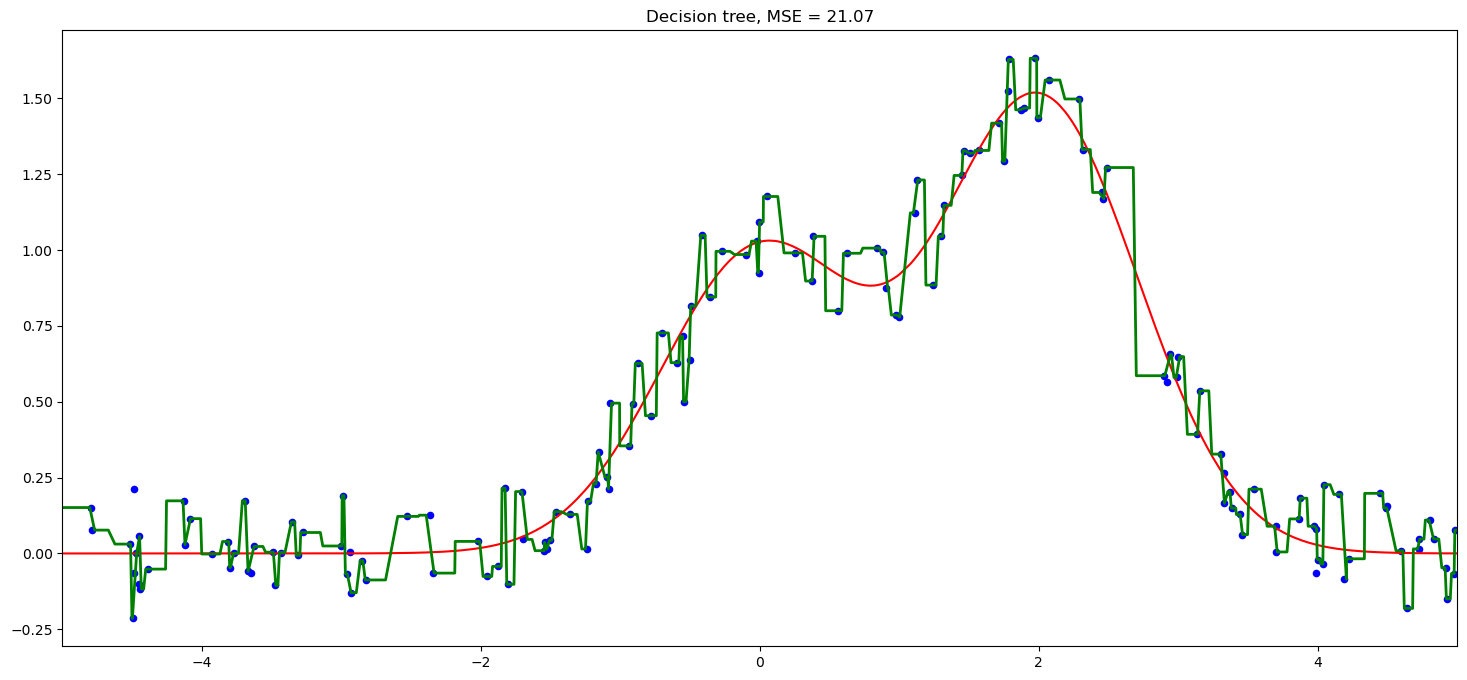

In [16]:
# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

Text(0.5, 1.0, 'Random forest, MSE = 15.72')

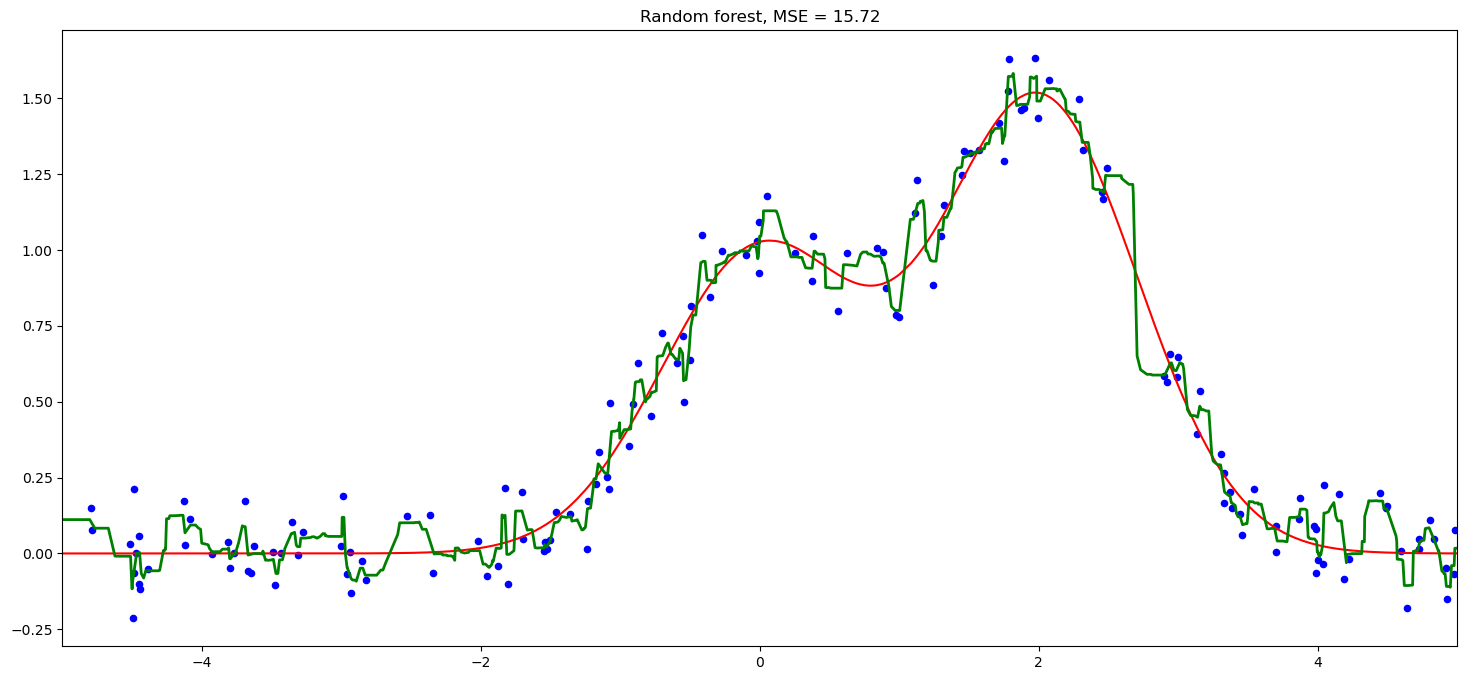

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2))